<a href="https://colab.research.google.com/github/joaopgioio/roubo_de_celular_em_SP/blob/master/Estudo_dos_Roubos_de_Celulares_na_Capital_de_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBS: 

#### Este notebook possui HTML/Javascript incorporado a alguns graficos, que não são renderizados pelo github. 
#### Para a visualização de todos os gráficos e do notebook completo, abra o notebook com o __NBViewer__. 

<br>

# Estudo das Ocorrências de Roubo de Celular na Capital de SP

<br>

### Índice:
1. Introdução
2. Importando Bibliotecas e Datasets
3. Conhecendo os Dados
4. Pré-processamento
5. Análise Exploratória
6. Prevendo Roubos de Celular 
<br>    6.1. - Modelagem ARIMA
<br>    6.2. - Validação
<br>    6.3. - Previsão


### 1. Introdução:

#### Apresentando o dataset:
__ANO_BO__ - Ano de registro da ocorrência.
<br>__DATAOCORRENCIA__: Data do roubo do celular.
<br>__PERIDOOCORRENCIA__: Período do roubo do celular.
<br>__BAIRRO__ - Bairro em que o celular foi roubado.
<br>__CIDADE__ - Cidade em que o celular foi roubado.
<br>__LATITUDE__ - Latitude em que o celular foi roubado.
<br>__LONGITUDE__ - Longitude em que o celular foi roubado.
<br>__LOGRADOURO__ - Logradouro em que o celular foi roubado.
<br>__DESCRICAOLOCAL__ - Descrição do local em que o celular foi roubado.
<br>__DESCR_TIPO_VEICULO__ - Descrição do veículo em que o celular foi roubado.


#### Objetivos:
 - Determinar como as ocorrências de roubo de celular evoluiram em relação ao tempo.
 - Determinar os períodos onde ocorrem os maiores números de roubo de celular.
 - Determinar os logradouros, bairros e regiões com maiores números de roubo de celular.
 - Determinar os locais com maiores números de roubo de celular.
 - Determinar veículos com maiores números de roubo de celular em veículo.
 - Utilizar o modelo ARIMA para prever o número de ocorrências nos próximos anos.
 
 
#### Sobre o dataset:

Desde 1995, a Secretaria da Segurança Pública divulga de forma pioneira no Brasil os indicadores criminais <br>
trimestralmente no Diário oficial.

Em decorrência da evolução da tecnologia e o amplo uso da internet, a partir de abril de 2011 esses dados <br>
passaram a ser divulgados em seu site mensalmente por região, município e unidade policial.<br>

Além desses dados, são apresentados estudos como o Perfil de Homicídio e o Perfil de Roubos além da <br>
produtividade policial.

Ampliando essa divulgação, desde 09 de maio de 2016, a SSP/SP mantém o maior portal de informações sobre <br>
segurança pública do país, disponibilizando boletins de ocorrência, inclusive os complementares, disponíveis <br>
no sistema Registro Digital de Ocorrências da Polícia Civil (RDO) desde 2003, em relação aos homicídios dolosos, <br>
latrocínios e lesão corporal seguida de morte e registrados a partir de 2013, tanto em relação a morte decorrente <br>
de oposição intervenção policial, quanto em relação aos casos de mortes suspeitas.

Na mesma data também foi disponibilizada tabela de dados referentes aos óbitos que deram entrada no Instituto <br>
Médico Legal (IML) desde 2013, ano em que foi implantado o serviço digital de Gestão de Laudos (GDL) da <br>
Superintendência da Polícia Técnico-Cientifica (SPTC), com os respectivos números dos laudos e boletins de <br>
ocorrência, data de entrada no IML, características das vítimas e número da Declaração de Óbito.

Com a evolução do serviço, em abril de 2017, foram incluídos para pesquisa todos os boletins de roubo e de <br>
furto de veículos disponíveis no RDO desde 2003, além da melhoria do serviço pela possibilidade de extração <br>
dos dados em formato excel.

Em 25 de maio de 2017, para atendimento a uma necessidade demonstrada através de inúmeros pedidos dirigidos à <br>
Secretaria, foram disponibilizados todos os boletins de ocorrência de roubo e furto onde há ao menos um celular <br>
subtraído.

Fonte: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

Os dados estão disponibilizados em http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

### 2. Importando Bibliotecas e Datasets

In [67]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import glob
import re
import itertools
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import squarify

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly

from folium import Map
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings("ignore")

In [69]:
# FUNÇÃO PARA IMPORTAR DATASET

dir_path = "data/"

def importaData(files):
    
    data = dir_path + files
    allFiles = glob.glob('data/*.csv')

    list_ = []
    cols = ['ANO_BO','DATAOCORRENCIA', 'PERIDOOCORRENCIA', 'BAIRRO', 'CIDADE', 'LATITUDE', 'LONGITUDE', 'LOGRADOURO', \
           'DESCRICAOLOCAL', 'DESCR_TIPO_VEICULO']

    for file_ in allFiles:
        #print(file_)
        #df = pd.read_csv(file_,encoding="latin1", delimiter=';')
        #df = pd.read_csv(file_,index_col=None, header=0, encoding="utf-8", sep=';', usecols=cols)
        df = pd.read_csv(file_,index_col=None, header=0, delimiter=';', usecols=cols)
        #df = pd.read_csv(file_,index_col=None, header=0, encoding="iso8859-1", delimiter=';', error_bad_lines=False)
        #df = pd.read_csv(file_,index_col=None, header=0, encoding="latin1", sep=';', usecols=cols)
        list_.append(df)
        #print(list_)

    df = pd.concat(list_, axis = 0, ignore_index = True)
    
    return df

# IMPORTANDO DATASET

all_data = importaData('*.csv')

### 3. Conhecendo os Dados

In [70]:
# VISUALIZANDO DATAFRAME

all_data.tail()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DESCR_TIPO_VEICULO
1304698,2011,31/12/2011,A NOITE,R PROFA ABIGAIL ALVES PIRES,RIO PEQUENO,S.PAULO,"-23,57538646","-46,7620554",Via pública,AUTOMOVEL
1304699,2011,31/12/2011,A NOITE,AV DONA BELMIRA MARIN,NaN,S.PAULO,"-23,74402697","-46,69104456",Via pública,NaN
1304700,2011,31/12/2011,A NOITE,NaN,NaN,NaN,NaN,NaN,Via pública,AUTOMOVEL
1304701,2011,31/12/2011,A NOITE,R DR CARNEIRO MAIA,AGUA FUNDA,S.PAULO,"-23,63196353","-46,62591544",Via pública,NaN
1304702,2011,31/12/2011,A NOITE,R VICENTE STRICHALSKY,VILA GUACURI,S.PAULO,"-23,70308973","-46,63013936",Via pública,AUTOMOVEL


In [71]:
# DESCRIÇÃO ESTATÍSTICA

all_data.describe()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DESCR_TIPO_VEICULO
count,1304703,1304702,1304702,1215343,1041685,1215345,1066431,1066429,1304701,302552
unique,14,4256,7,116080,34936,387,432700,433678,38,26
top,2014,06/05/2014,A NOITE,AVENIDA SAPOPEMBA,JABAQUARA,S.PAULO,"-23,50594973","-46,45693179",Via pública,AUTOMOVEL
freq,195621,1294,577242,4072,20177,1174304,988,988,895433,190430


In [72]:
print("Tipos de dados e valores 'missing': ")

all_data.info()

Tipos de dados e valores 'missing': 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304703 entries, 0 to 1304702
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ANO_BO              1304703 non-null  object
 1   DATAOCORRENCIA      1304702 non-null  object
 2   PERIDOOCORRENCIA    1304702 non-null  object
 3   LOGRADOURO          1215343 non-null  object
 4   BAIRRO              1041685 non-null  object
 5   CIDADE              1215345 non-null  object
 6   LATITUDE            1066431 non-null  object
 7   LONGITUDE           1066429 non-null  object
 8   DESCRICAOLOCAL      1304701 non-null  object
 9   DESCR_TIPO_VEICULO  302552 non-null   object
dtypes: object(10)
memory usage: 99.5+ MB


### 4. Pré-processamento

In [73]:
# REMOVENDO DADOS DUPLICADOS

def removeDuplicados(df):
    
    print('Quantidade de dados duplicados: ', df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print('Quantidade de dados duplicados após remoção: ', df.duplicated().sum())
    
    return df

all_data = removeDuplicados(all_data)

Quantidade de dados duplicados:  336399
Quantidade de dados duplicados após remoção:  0


In [74]:
# FILTRANDO DADOS DE S.PAULO

def filtraSP(df):

    df.CIDADE.fillna('S.PAULO')
    df = df[df['CIDADE'] == 'S.PAULO']
    del df['CIDADE']
    
    return df

all_data = filtraSP(all_data)

In [75]:
# TRANSFORMANDO STRINGS PARA LOWER CASE

def lowerCase(df, cols):
    for col in cols:
        df[col] = df[col].str.title()
    
    return df

colsToLower = ["PERIDOOCORRENCIA", "LOGRADOURO", "BAIRRO", "DESCR_TIPO_VEICULO"]

all_data = lowerCase(all_data, colsToLower)

In [76]:
# PADRONIZANDO STRINGS

def correct_string(string):
        string = string.replace('Avenida ', 'Av. ').replace('Av ', 'Av. ').replace('Rua ', 'R. ').replace('R ', 'R. ') \
                    .replace('R ', 'R. ').replace(',', '.').replace('Praça ', 'Pr. ').replace('Pr ', 'Pr. ') \
                    .replace('Pública', 'pública').replace('Jardim', 'Jd.').replace('Jd ', 'Jd. ')
        return string

all_data.DESCRICAOLOCAL = all_data.astype(str).DESCRICAOLOCAL.apply(correct_string)  
all_data.LOGRADOURO = all_data.astype(str).LOGRADOURO.apply(correct_string)
all_data.LATITUDE = all_data.LATITUDE.astype(str).apply(correct_string).astype(float)
all_data.LONGITUDE = all_data.LONGITUDE.astype(str).apply(correct_string).astype(float)

In [77]:
# TRANSFORMANDO DADOS TEMPORAIS

def tratarDatas(df, col = 'DATAOCORRENCIA'):
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce')

    indexs = []

    for row in df[col].items():
        if row[1] < pd.datetime(2010, 1, 1):
            indexs.append(row[0])
        
    df.drop(index=indexs, axis=1, inplace=True)

    df['diasemana'] = df[col].dt.day_name()
    df['mesano'] = df[col].dt.strftime('%Y-%m')
    df['mes'] = df[col].dt.month

    df.drop(index=df[df['mesano'] == 'NaT'].index, inplace=True, axis=0)
    
    return df
    
all_data = tratarDatas(all_data)

### 5. Análise Exploratória

In [78]:
# VISUALIZANDO DATAFRAME LIMPO

all_data.head()

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE,DESCRICAOLOCAL,DESCR_TIPO_VEICULO,diasemana,mesano,mes
0,2011,2011-03-31,A Noite,Av. Eng Armando De Arruda Pereira,NaN,-23.658624,-46.635926,Via pública,Automovel,Thursday,2011-03,3.0
1,2011,2011-03-29,A Noite,R. Belchior Paulo,NaN,-23.491660,-46.647273,Via pública,NaN,Tuesday,2011-03,3.0
2,2011,2011-03-31,A Noite,R. Valdemar Paiva E Almeida,Cid.Nove São Miguel,-23.506529,-46.433938,Via pública,Automovel,Thursday,2011-03,3.0
4,2011,2011-03-25,A Noite,Av. Francisco Matarazzo,Perdizes,-23.531933,-46.663847,Via pública,NaN,Friday,2011-03,3.0
5,2011,2011-03-31,A Noite,R. Paes Leme,NaN,-23.567655,-46.696554,Via pública,NaN,Thursday,2011-03,3.0


In [79]:
df_ts = all_data.groupby('DATAOCORRENCIA').count()["ANO_BO"].to_frame().rename(columns={"ANO_BO": "OCORRENCIAS"})

trace = [go.Scatter(x = df_ts.index, y = df_ts.OCORRENCIAS)]

layout = dict(
    title='Ocorrências de Roubo de Celular',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

In [80]:
ocorrencias = all_data.groupby('mesano').count()['ANO_BO'].reset_index()
ocorrencias.rename(columns={'mesano': 'Data', 'ANO_BO':'Ocorrências de Roubo de Celular'}, inplace=True)

trace = [go.Scatter(x = ocorrencias.Data, y = ocorrencias['Ocorrências de Roubo de Celular'])]

layout = dict(
    title='Ocorrências de Roubo de Celular por Mês',
    yaxis=dict(
    title='Ocorrências'
    ),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12,
                     label='1yr',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=trace, layout=layout)
py.iplot(fig)

Claramente podemos ver uma tendência de aumento no número de ocorrência de roubo de celular.
<br><br>Alguns dos fatores que podem explicar esse aumento são:
<br> - Aumento do número de aparelhos celulares e smartphones.
<br> - Aumento na utilização dos aparelhos em público, devido ao avanço de tecnologias de troca de mensagens.
<br> - Aumento da criminalidade.
<br> - Aumento no número de boletins de ocorrências devido as plataformas digitais.

In [81]:
# CALCULANDO VARIAÇÕES NO NÚMERO DE OCORRÊNCIAS POR ANO

all_data.ANO_BO = all_data.ANO_BO.astype(int)
ocorrencias_ano = all_data.groupby('ANO_BO').count()['DATAOCORRENCIA'].reset_index()
ocorrencias_ano['VARIACAO'] = 0
ocorrencias_ano['VARIACAO_ACUMULADA'] = 0

for i in range (0, 8):
    ocorrencias_ano.iloc[i+1, 2] = round((1 - (ocorrencias_ano.iloc[i, 1] / ocorrencias_ano.iloc[i+1, 1])) * 100, 2)
    ocorrencias_ano.iloc[i+1, 3] = round((ocorrencias_ano.iloc[i, 3] + ocorrencias_ano.iloc[i+1, 2]), 2)
    
ocorrencias_ano.VARIACAO = ocorrencias_ano.VARIACAO.astype(str) + ' %'
ocorrencias_ano.VARIACAO_ACUMULADA = ocorrencias_ano.VARIACAO_ACUMULADA.astype(str) + ' %'
    
ocorrencias_ano

,ANO_BO,DATAOCORRENCIA,VARIACAO,VARIACAO_ACUMULADA
0,2010,71724,0.0 %,0.0 %
1,2011,76847,6.67 %,6.67 %
2,2012,80535,4.58 %,11.25 %
3,2013,97868,17.71 %,28.96 %
4,2014,118484,17.4 %,46.36 %
5,2015,102453,-15.65 %,30.71 %
6,2016,125376,18.28 %,48.99 %
7,2017,123824,-1.25 %,47.74 %
8,2018,110121,-12.44 %,35.3 %


In [82]:
data = [
    go.Bar(
        x = ocorrencias_ano.ANO_BO.values[1:],
        y = ocorrencias_ano.VARIACAO.values[1:],
        marker = dict(
          color = ['green', 'green', 'green', 'green', 'red', 'green', 'red', 'red']
        ),
        name = 'Variação com ano anterior'
    ), 
    go.Scatter(
        x = ocorrencias_ano.ANO_BO.values[1:], 
        y = ocorrencias_ano.VARIACAO_ACUMULADA.values[1:],
        marker = dict(
          color = 'blue'
        ),        
        name = 'Variação acumulada'
    )
]

layout = dict(
    title='Variação do Número de Ocorrências de Roubo de Celular',
    yaxis=dict(
        title='Variação (%)',
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [83]:
all_data['diasemana'] = pd.Categorical(all_data['diasemana'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

trace = [go.Bar(
            x = all_data['diasemana'].value_counts().sort_index().index,
            y = all_data['diasemana'].value_counts().sort_index().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular por Dia da Semana (2010 - 2018)',
    yaxis=dict(
        title='Ocorrências'
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

In [84]:
colors = ['#170B3B', '#A9D0F5', '#08088A', '#DBA901']

trace = [go.Pie(labels=all_data.PERIDOOCORRENCIA.unique(), values=all_data.PERIDOOCORRENCIA.value_counts().values,
               hoverinfo='label+percent', 
               textfont=dict(size=18),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))]

layout = go.Layout(
    title='Período das Ocorrências de Roubo de Celular (2010 - 2018)'
)

fig = go.Figure(data = trace, layout = layout)

py.iplot(fig)

In [85]:
# FILTRANDO DADOS DE 2018

data = all_data[all_data["ANO_BO"] == 2018].copy()

In [86]:
trace = [go.Bar(
            y = data['DESCRICAOLOCAL'].value_counts().index,
            x = data['DESCRICAOLOCAL'].value_counts().values,
            orientation='h',
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    height=800,
    title='Locais das Ocorrências de Roubo de Celular em 2018',
    xaxis=dict(
        title = 'Ocorrências',
        type='log',
        ),
     yaxis=go.layout.YAxis(
     automargin=True
     )
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

As vias públicas são os locais de grande preferência da criminalidade para roubar celulares.

In [87]:
data_ = data[(data['DESCR_TIPO_VEICULO'] != 'Inexist.') & (data['DESCR_TIPO_VEICULO'] != 'Não Informado')]

trace = [go.Bar(
            x = data_["DESCR_TIPO_VEICULO"].value_counts().index,
            y = data_["DESCR_TIPO_VEICULO"].value_counts().values,
            text=data_["DESCR_TIPO_VEICULO"].value_counts().values,
            textposition = 'auto',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1,
                    )
                ),
            opacity=0.8
)]
           
layout = go.Layout(
    title='Ocorrências de Roubo de Celular em Veículos (2018)',
    yaxis=dict(
        title='Ocorrências',
        ),
)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig)

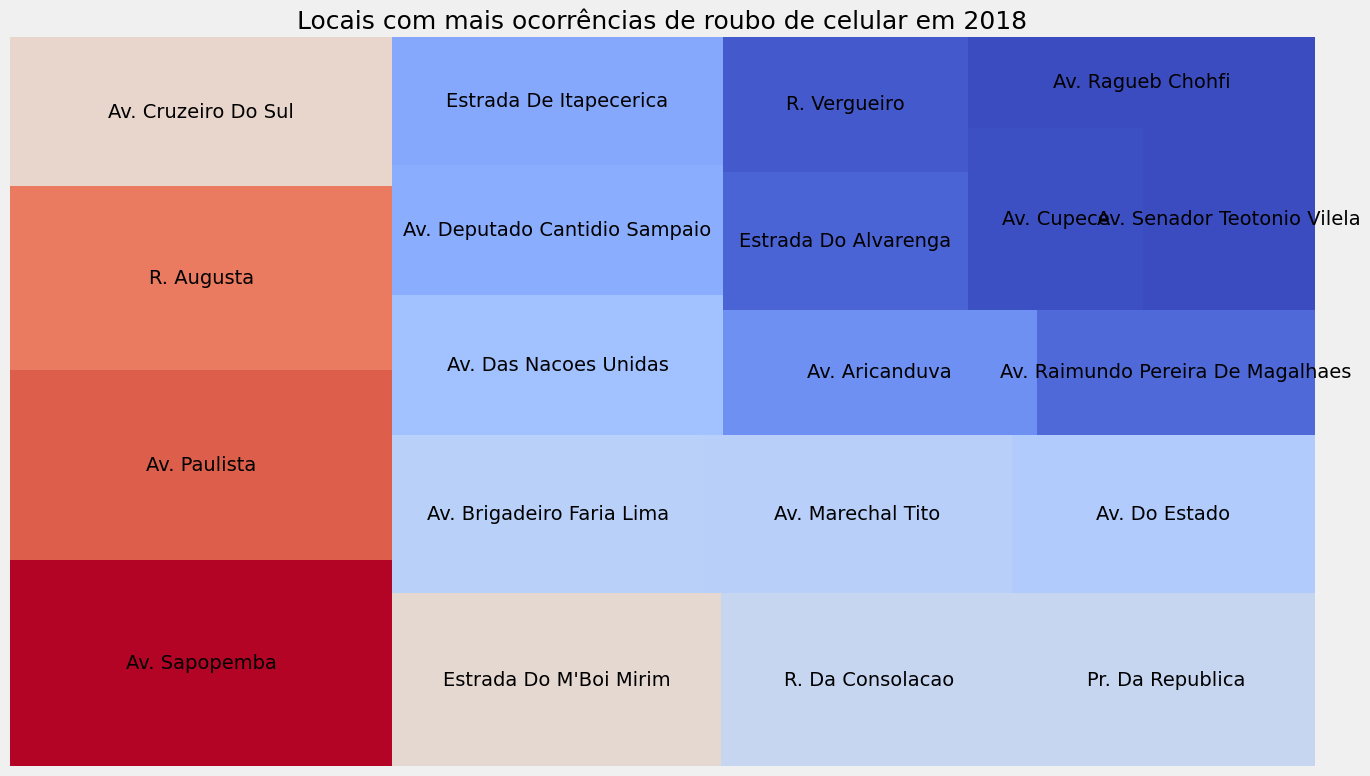

In [88]:
fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data.LOGRADOURO.value_counts().values[19]
maxi = data.LOGRADOURO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data.LOGRADOURO.value_counts().iloc[:100].values]

squarify.plot(sizes=data.LOGRADOURO.value_counts().iloc[:20].values, label=data.LOGRADOURO.value_counts().iloc[:20].index, color=colors)

plt.axis('off')
plt.title("Locais com mais ocorrências de roubo de celular em 2018", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

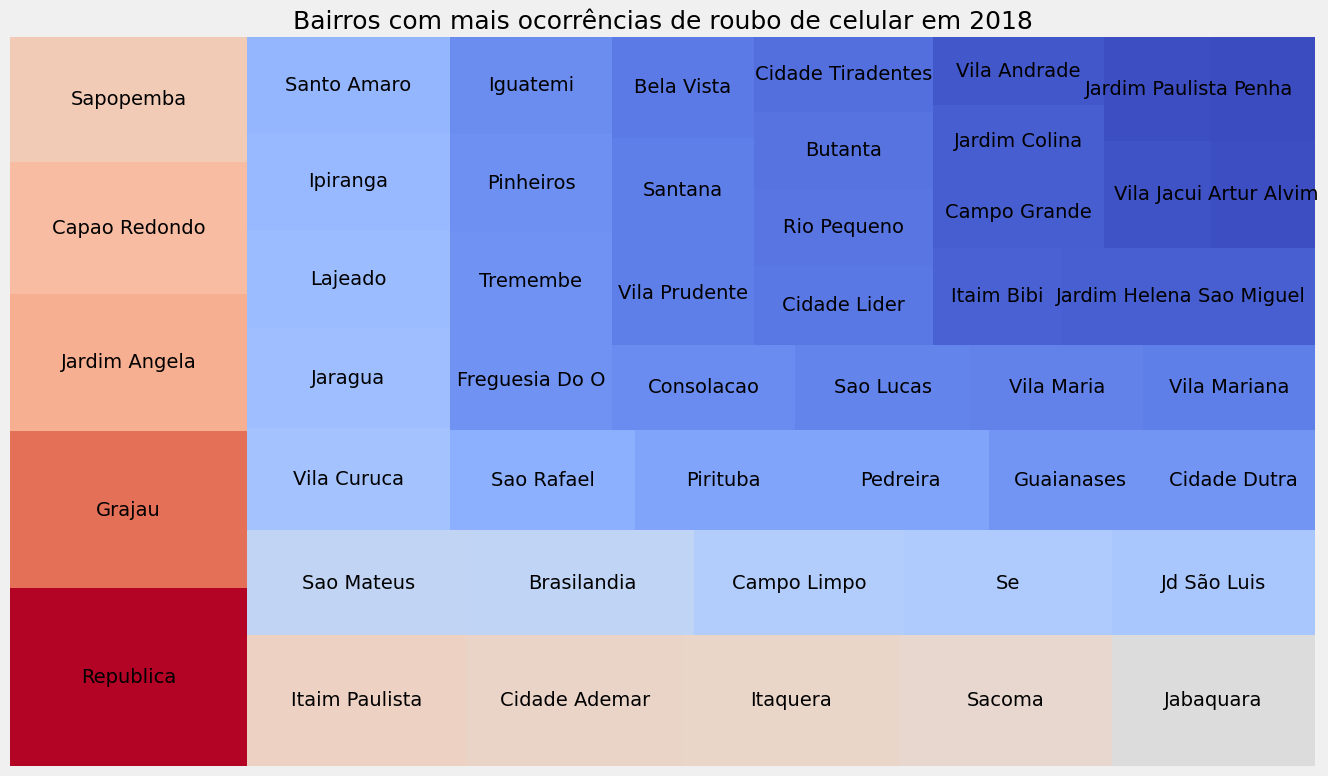

In [89]:
fig, ax = plt.subplots(figsize=(15,9))

cmap = matplotlib.cm.coolwarm
mini = data.BAIRRO.value_counts().values[49]
maxi = data.BAIRRO.value_counts().values[0]
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data.BAIRRO.value_counts().iloc[:100].values]

squarify.plot(sizes=data.BAIRRO.value_counts().iloc[:50].values, label=data.BAIRRO.value_counts().iloc[:50].index, color=colors)

plt.axis('off')
plt.title("Bairros com mais ocorrências de roubo de celular em 2018", fontsize=18)
ttl = ax.title
ttl.set_position([.5, 1.05])

In [90]:
# REMOVENDO NAs E CRIANDO COLUNA COORDENADAS

df = data.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()
df = df[df['DATAOCORRENCIA'] > "2018-10-01"]
df['coord'] = df[['LATITUDE','LONGITUDE']].apply(tuple, axis=1)

#### Mapa de Calor dos Roubos de Celulares em Outubro e Novembro de 2018

In [91]:
m = Map([-23.64992751, -46.62569322], zoom_start=10, width='100%', height='100%')
m.add_child(HeatMap(df['coord'], radius=8))
m

#### ClusterMap dos Roubos de Celulares em Outubro e Novembro de 2018

In [92]:
pointMap = Map([-23.550, -46.620], zoom_start=10.5, width='100%', height='100%')
pointMap.add_child(FastMarkerCluster(df['coord']))
pointMap

## 6. Prevendo Roubos de Celular

### 6.1. Modelagem ARIMA

In [93]:
# TRANSFORMANDO SÉRIE TEMPORAL

ocorrencias.index =  ocorrencias.Data
ocorrencias.drop(columns='Data', inplace=True)
ocorrencias.index = pd.to_datetime(ocorrencias.index)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


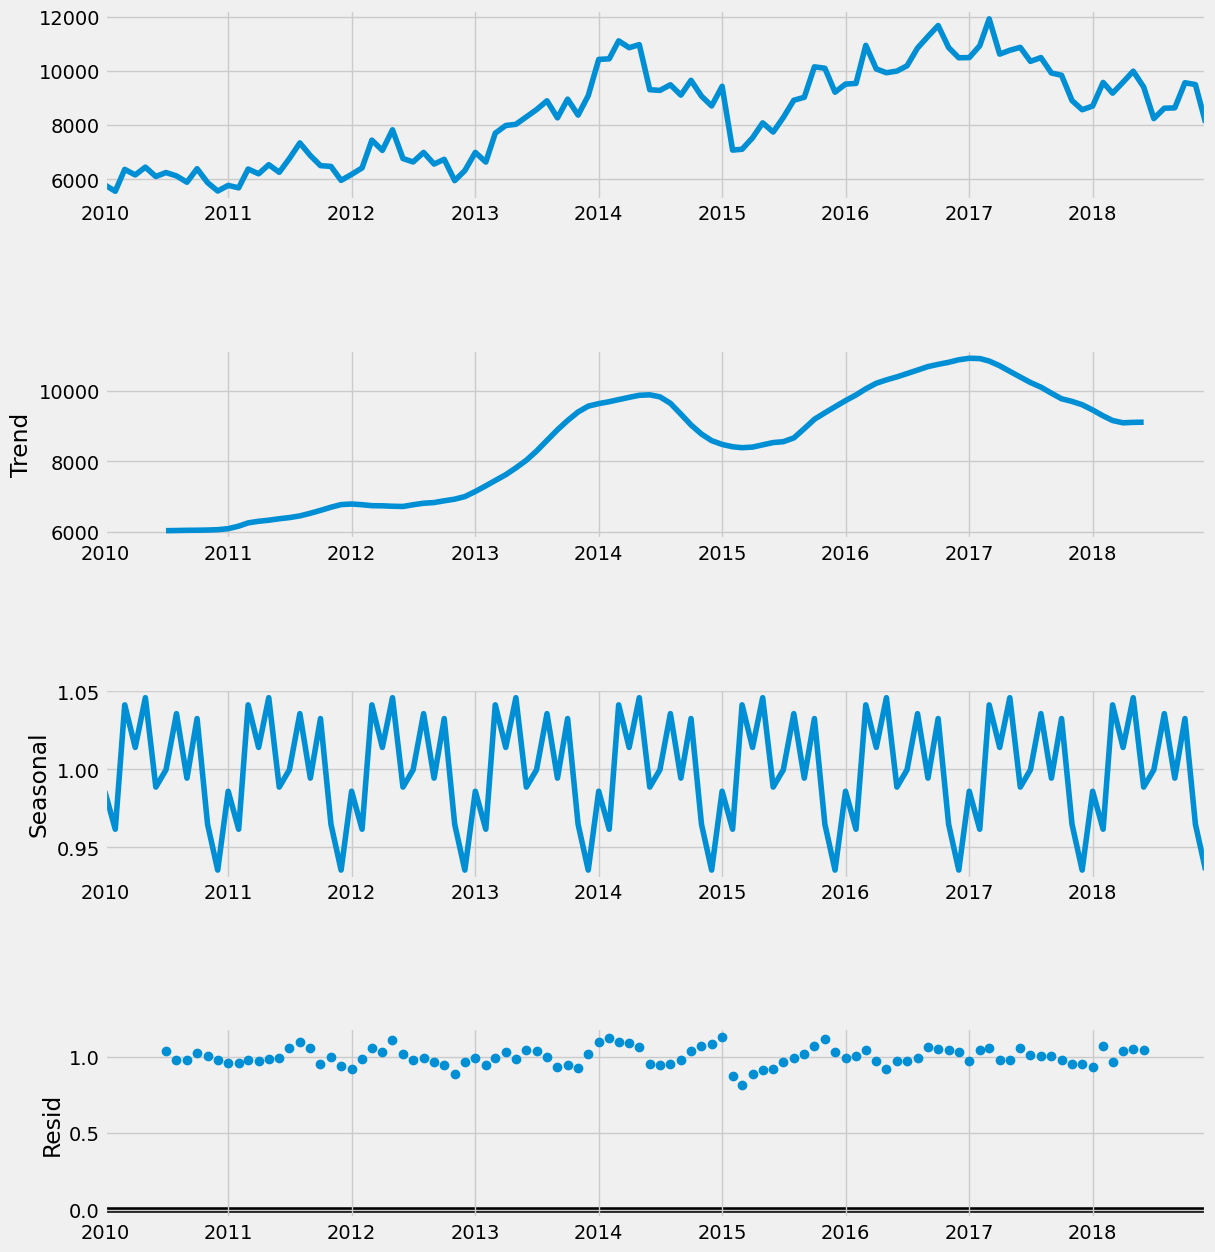

In [94]:
# IMPORTANDO BIBLIOTECAS

!pip install chart-studio
#from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

# DECOMPOSIÇÃO DA SÉRIE TEMPORAL

result = seasonal_decompose(ocorrencias, model='multiplicative')
g = result.plot()
g.set_figwidth(14)
g.set_figheight(14)

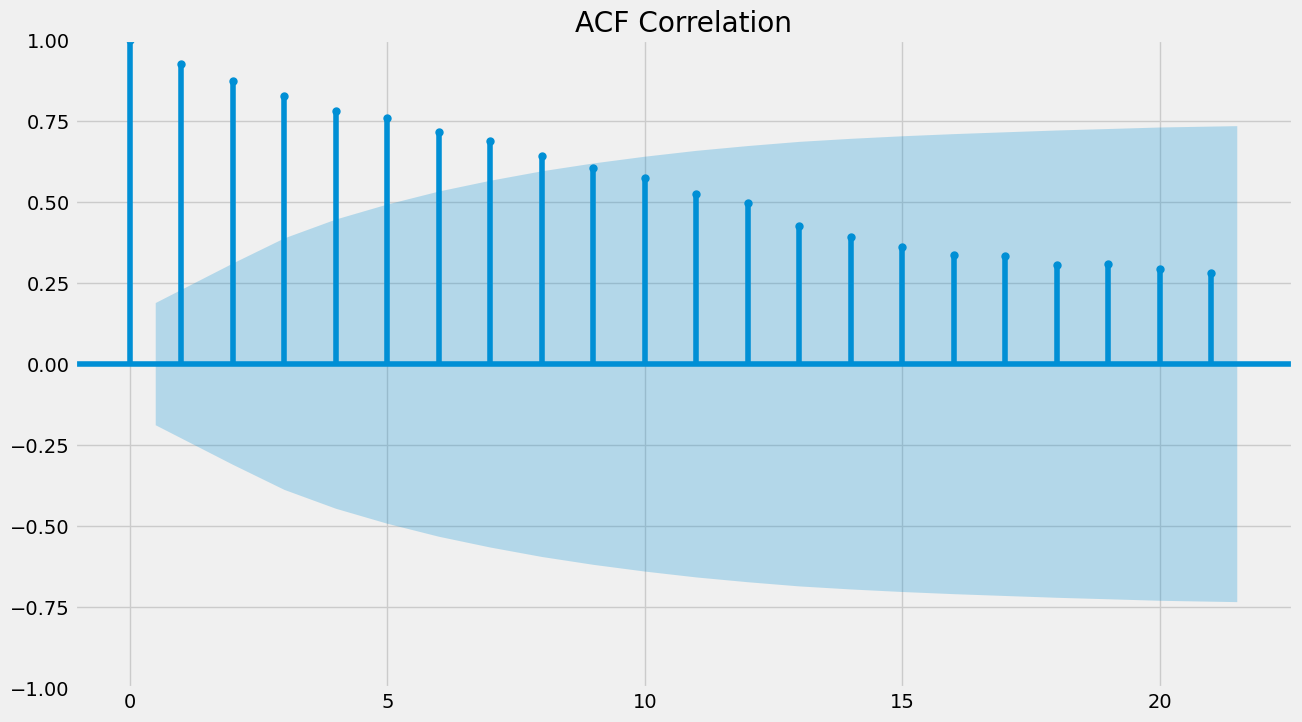

In [95]:
# IMPORTANDO BIBLIOTECAS

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# PLOT DE CORRELAÇÃO ACF

g = plot_acf(ocorrencias, title="ACF Correlation")
g.set_figheight(8)
g.set_figwidth(14)

Podemos começar diferenciando a série temporal com ordem d = 1, a fim de obter uma série temporal estacionária. Se a série não representar bons resultados, outras diferenciações podem ser necessarias.

In [96]:
# DIFERENCIANDO SÉRIE TEMPORAL

ocorrencias_diff = ocorrencias.diff(periods=1)
ocorrencias_diff = ocorrencias_diff[1:]

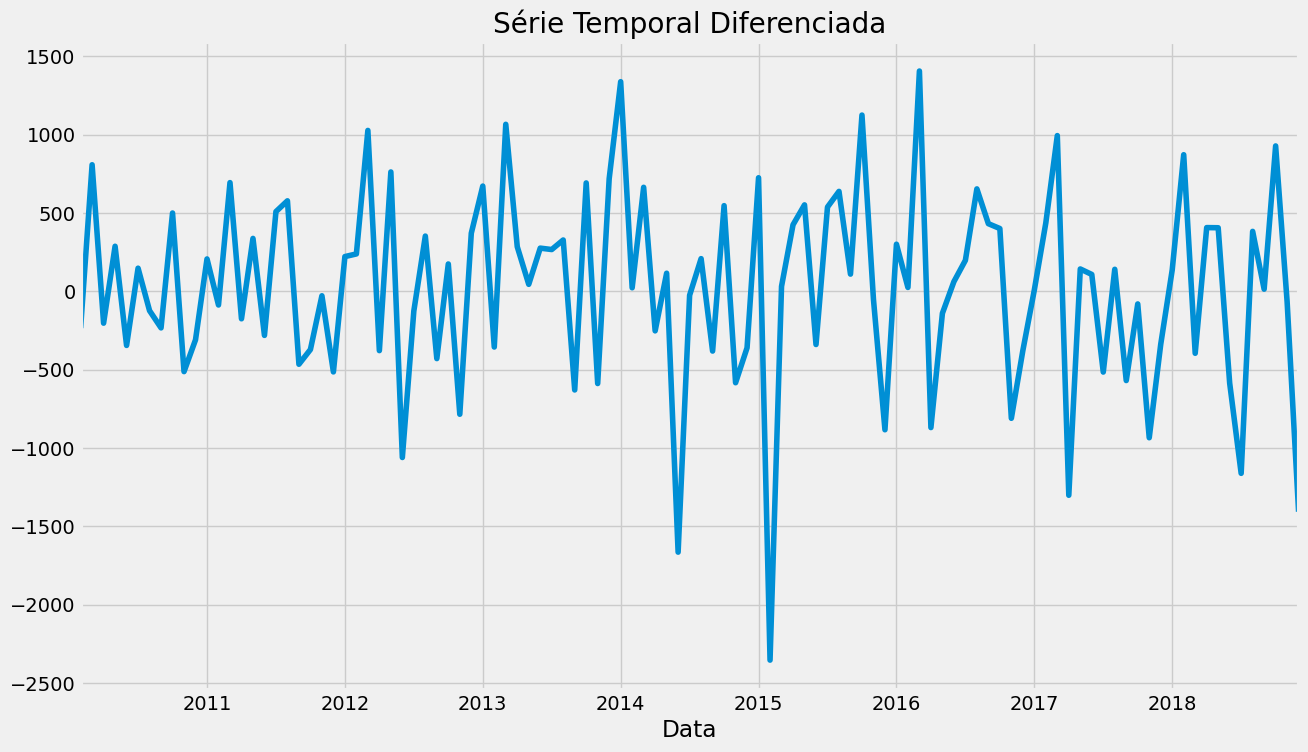

In [97]:
# PLOT DA SÉRIE TEMPORAL DIFERENCIADA COM D = 1

g = ocorrencias_diff.plot(figsize=(14,8), title="Série Temporal Diferenciada", legend=False)

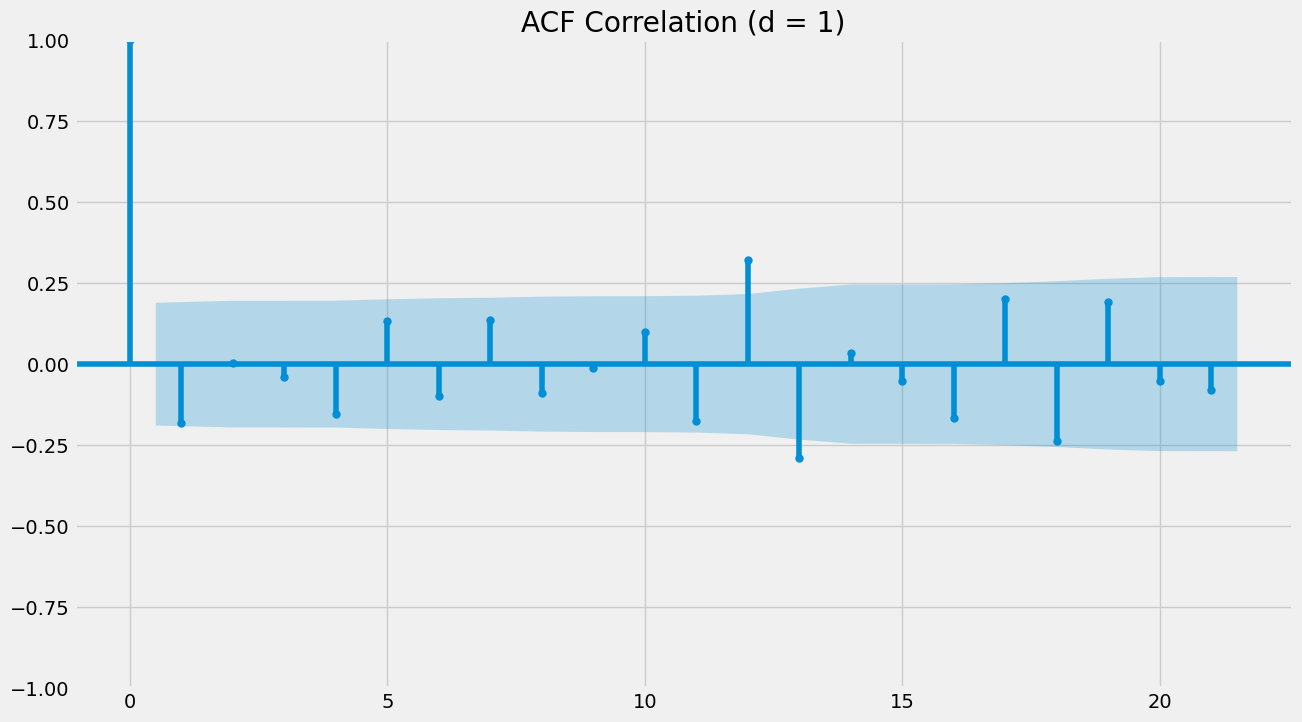

In [98]:
# PLOT CORRELAÇÃO ACF

g = plot_acf(ocorrencias_diff, title="ACF Correlation (d = 1)")
g.set_figheight(8)
g.set_figwidth(14)

Através do ACF plot, podemos ver que o valor q = 13, pode ser uma boa escolha de parâmetro.

In [99]:
# DEFINE COMBINAÇÕES ENTRE p DE 0 A 3, d = 1, e q = 13
pdq = [(p, 1, 13) for p in range(0, 4)]

# DEFINE P e Q ENTRE 0 e 3
P = Q = range(0, 4)

# DEFINE COMBINAÇÕES ENTRE P, D e Q
seasonal_pdq = [(x[0], 1, x[1], 12) for x in list(itertools.product(P, Q))]

In [100]:
# CALCULANDO OS MELHORES PARÂMETROS PARA O MODELO

#scores = {}

#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(ocorrencias,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#
#            results = mod.fit()
#            scores[param, param_seasonal] = results.aic
#            
#        except:
#            continue
#            
#print("Melhores parâmetros: ", min(scores, key=scores.get)," AUC: ", min(scores.values()))

Melhores parâmetros:  ((3, 1, 13), (3, 1, 0, 12))  AUC:  916.5604661162852

In [101]:
# CRIANDO MODELO COM OS MELHOERS PARÂMETROS 

mod = sm.tsa.statespace.SARIMAX(ocorrencias,
                                order=(3, 1, 13),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

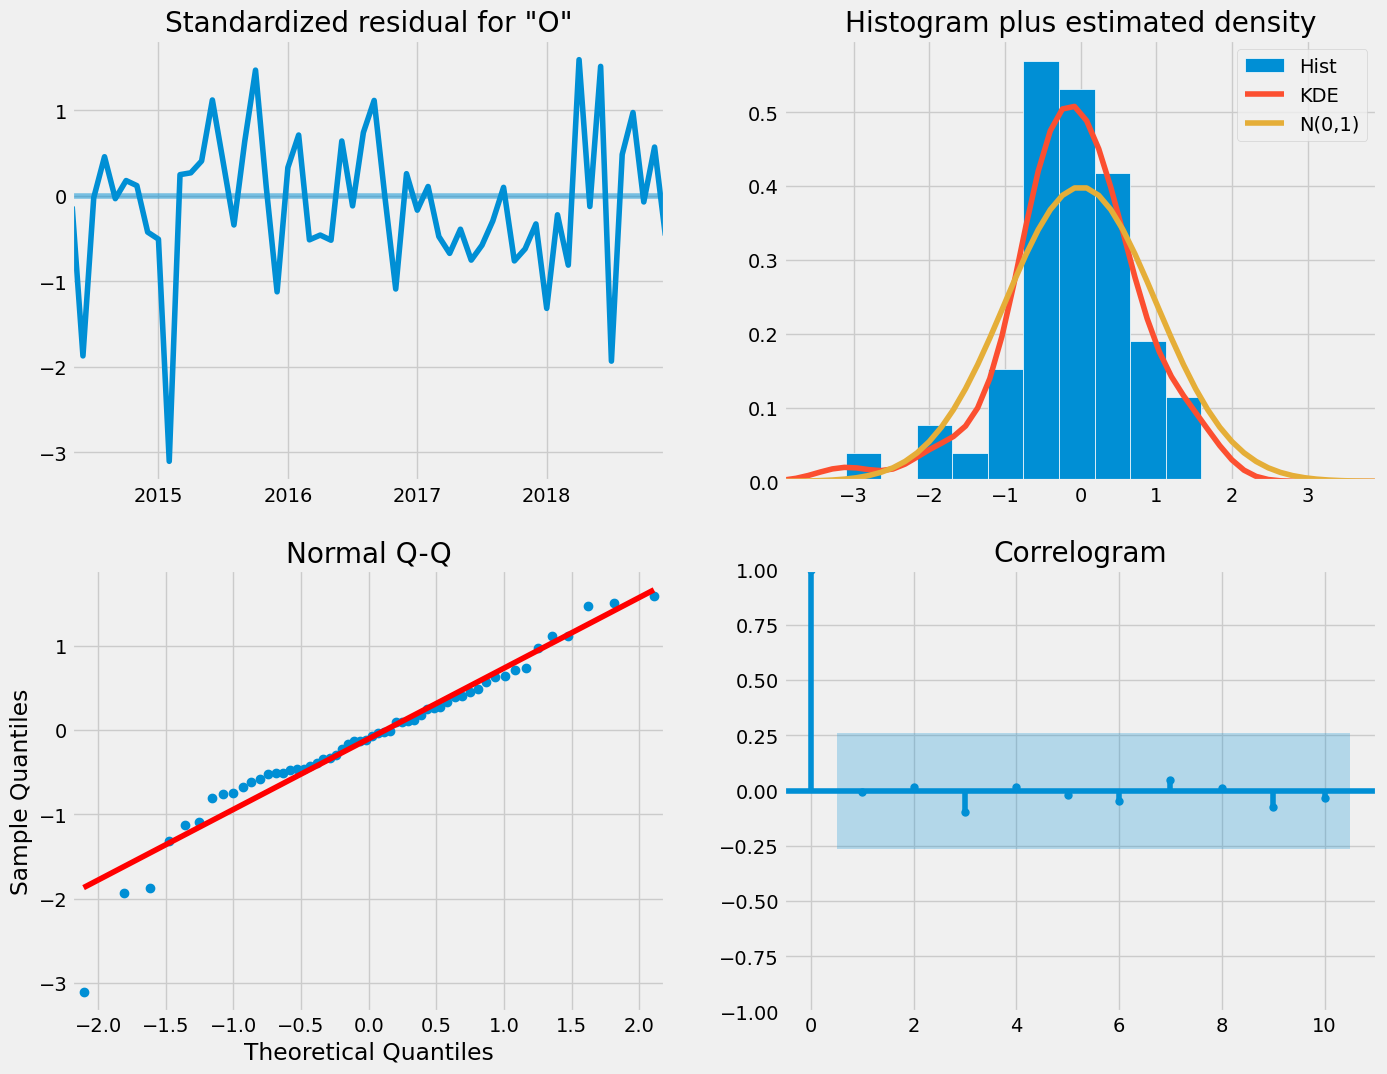

In [102]:
# RESUMO DO MODELO

results.plot_diagnostics(figsize=(15, 12))
plt.show()

### 6.2. Validação

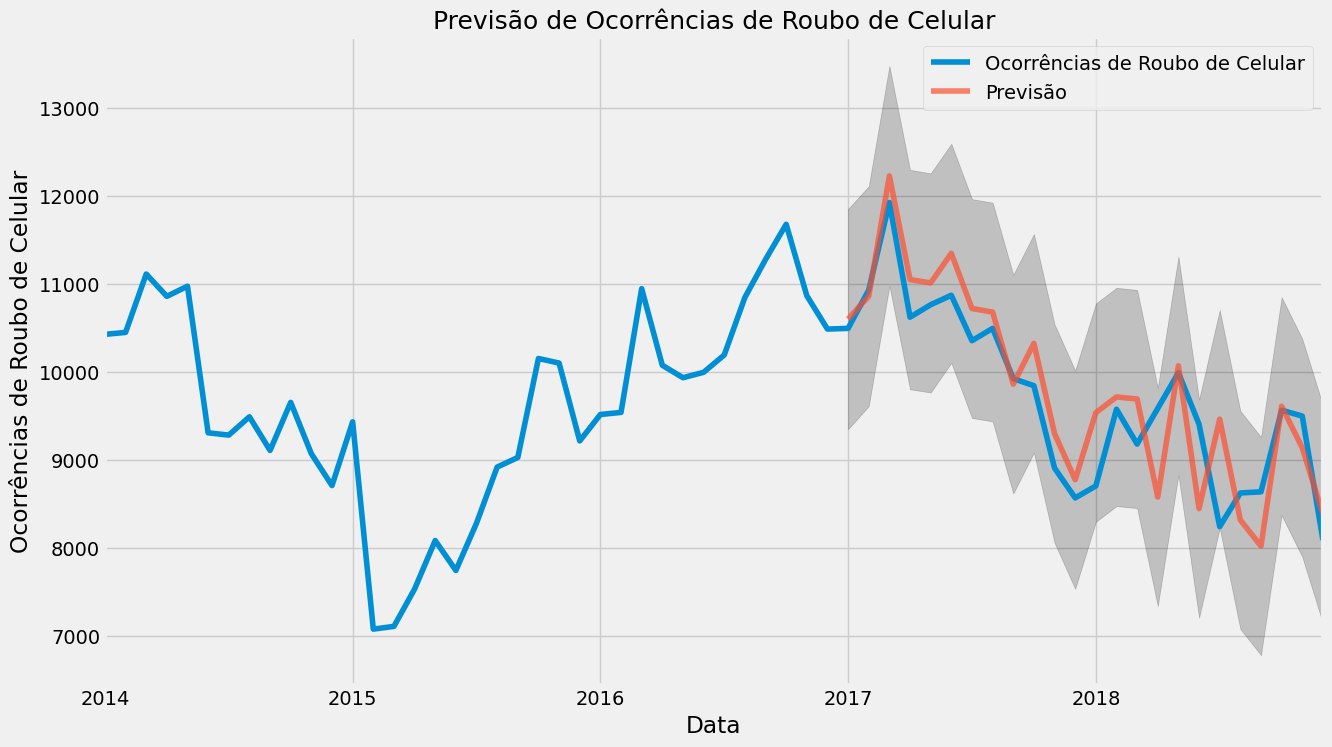

O Mean Squared Error da previsão foi 261162


In [103]:
# VALIDAÇÃO DO MODELO: PREVENDO OCORRÊNCIAS A PARTIR DE 2017

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = ocorrencias['2014':].plot(figsize=(14, 8))
pred.predicted_mean.plot(ax=ax, label='Previsão', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_title("Previsão de Ocorrências de Roubo de Celular", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Ocorrências de Roubo de Celular')
plt.legend()

plt.show()

# CALCULANDO MSE

y_forecasted = pred.predicted_mean
y_truth = ocorrencias["2017-01-01":].squeeze()

mse = ((y_forecasted - y_truth) ** 2).mean()

print('O Mean Squared Error da previsão foi {}'.format(round(mse)))

### 6.3. Previsão

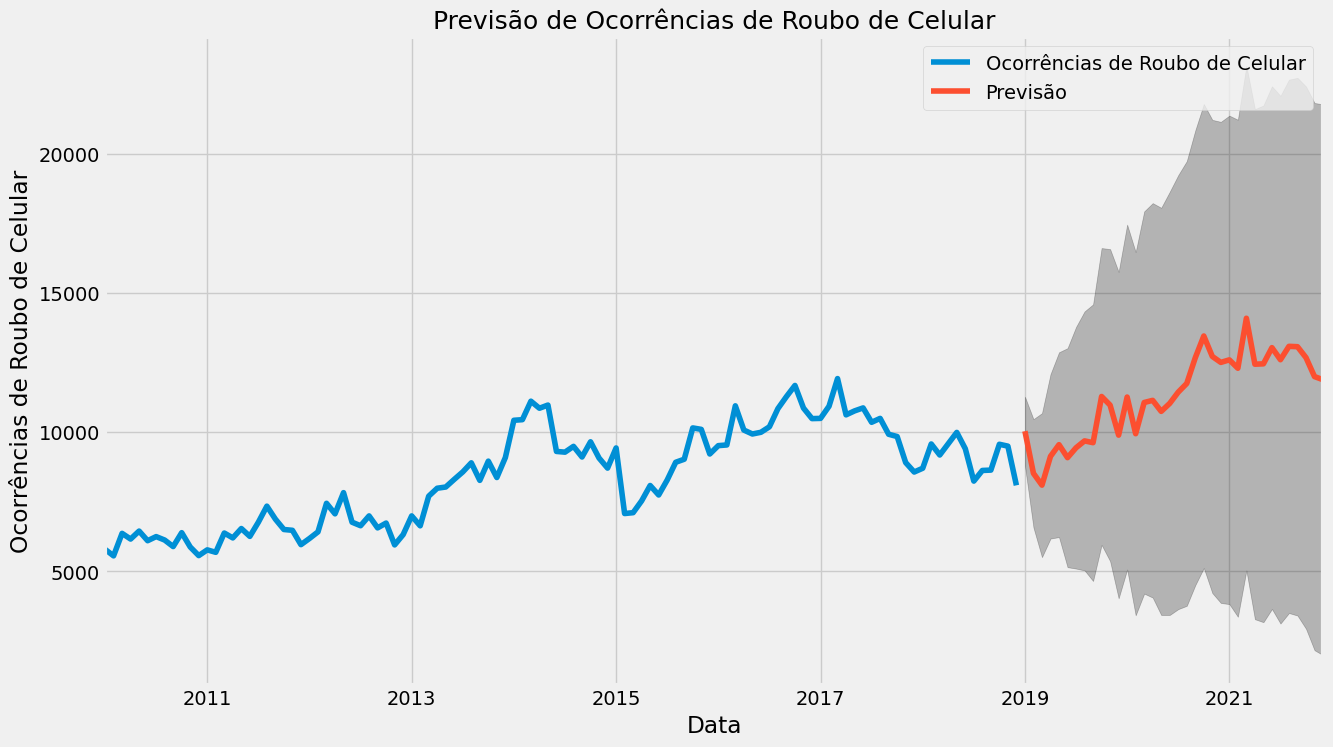

In [104]:
# PREVENDO OCORRÊNCIAS PARA OS PRÓXIMOS TRÊS ANOS

pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = ocorrencias['2010':].plot(figsize=(14, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Previsão')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_title("Previsão de Ocorrências de Roubo de Celular", fontsize=18)
ax.set_xlabel('Data')
ax.set_ylabel('Ocorrências de Roubo de Celular')

plt.legend()
plt.show()

A previsão realizada pelo modelo ARIMA reforça a tendência histórica de crescimento dos roubos de celulares, com um intervalo de confiança relativamente alto, devido as variações encontradas na série temporal.